<a href="https://colab.research.google.com/github/zdepablo/Attentive_Convolution/blob/master/News_Baseline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# News Dataset Multiclass classification model

## Objective 

Build a baseline model for the classifier using a scikit-learn

### Procedure 

We will start with a simple classifier and a simple notebook structure using only headlines. 

### TO-DO: Improvements 

  - Include short descriptions
  - Cross - Validation 
  - Use different fields for different parts of the document
  - Use a vocabulary, sopwords and pre-processing more careful - e.g. Spacy 
  - Be a bit more semantic: stemming, word2vec 
  - Compare with fasttext, word2vec, bert

### Conclusions 


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix



import seaborn as sns

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [11]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.5.
The scikit-learn version is 0.22.1.


## 1. Load the data and prepare

In [5]:
NEWS_TRAIN_PATH = "News_category_train.json"
NEWS_TEST_PATH  = "News_category_test.json"

df = pd.read_json(NEWS_TRAIN_PATH)
df_test = pd.read_json(NEWS_TEST_PATH)

num_instances_train = df.shape[0]
num_instances_test  = df_test.shape[0]

print(df.columns)

print(f"Train dataset size: {num_instances_train}")
print(f"Test  dataset size: {num_instances_test}")

Index(['authors', 'category', 'headline', 'link', 'short_description'], dtype='object')
Train dataset size: 65000
Test  dataset size: 34171


In [0]:
df["id"] = range(0,num_instances_train)
df_test["id"] = range(0,num_instances_test)

TODO: Clean anomalies like duplicated

## 2. Prepare dataset for classification 

In [0]:
X_train = df.headline
Y_train = df.category

X_test  = df_test.headline
Y_test  = df_test.category

## 2. Build model

In [0]:
vectorizer = CountVectorizer(encoding = 'utf-8',
                             strip_accents ='unicode', 
                             lowercase = True, 
                             stop_words = 'english', 
                             ngram_range =(1,1),
                             min_df = 10,
                             max_df = 0.7,
                             max_features = 5000
                             )

classifier = MultinomialNB(alpha=1.0, fit_prior=False)

pipeline = Pipeline([
    ('count_vectorizer', vectorizer),
    ('classifier',classifier)
    ])

In [135]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=5000, min_df=10,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))],
         verbose=False)

In [0]:
Y_train_hat = pipeline.predict(X_train)

In [121]:
Y_train_hat[0:10]

array(['A', 'A', 'J', 'A', 'A', 'A', 'B', 'G', 'A', 'A'], dtype='<U1')

In [122]:
print(classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

           A       0.43      0.73      0.54      2000
           B       0.50      0.74      0.59      2000
           C       0.44      0.85      0.58      2000
           D       0.80      0.64      0.71     10000
           E       0.78      0.84      0.81      5000
           F       0.88      0.82      0.85     10000
           G       0.93      0.75      0.83     20000
           H       0.46      0.75      0.57      2000
           I       0.48      0.67      0.56      2000
           J       0.80      0.80      0.80     10000

    accuracy                           0.76     65000
   macro avg       0.65      0.76      0.68     65000
weighted avg       0.80      0.76      0.77     65000



In [123]:
Y_test_hat = pipeline.predict(X_test)
print(classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

           A       0.51      0.55      0.53      1878
           B       0.54      0.62      0.58      1945
           C       0.46      0.75      0.57      1405
           D       0.48      0.58      0.53      1971
           E       0.72      0.81      0.76      2077
           F       0.89      0.78      0.83      6098
           G       0.93      0.73      0.82     12739
           H       0.62      0.65      0.63      2756
           I       0.24      0.49      0.32       670
           J       0.63      0.76      0.69      2632

    accuracy                           0.71     34171
   macro avg       0.60      0.67      0.63     34171
weighted avg       0.76      0.71      0.73     34171



In [124]:
len(pipeline['count_vectorizer'].vocabulary_)

5000

In [0]:
features = pipeline['count_vectorizer'].get_feature_names()

In [126]:
len(features)

5000

In [136]:
features[0:20]

['000',
 '10',
 '100',
 '101',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '1915',
 '1970s',
 '20',
 '200',
 '2012',
 '2013']

In [128]:
len(pipeline['count_vectorizer'].stop_words_)

27305

In [0]:
train_confusion_matrix = confusion_matrix(Y_train, Y_train_hat)

In [0]:
labels = ['A','B','C','D','E','F','G','H','I','J']

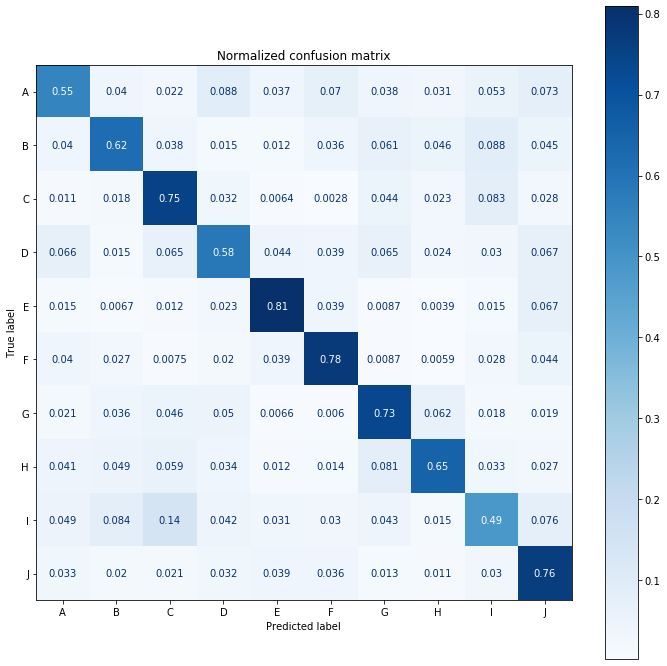

In [133]:
plt.rcParams["figure.figsize"] = (12,12)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format = '.2g')
disp.ax_.set_title("Normalized confusion matrix")

# print(title)
# print(disp.confusion_matrix)

plt.show()

In [0]:
features = pipeline['count_vectorizer'].transform(X_train)

In [0]:
def showFreqTerms(X_train_counts, vectorizer, ):
    sum_words = X_train_counts.sum(axis = 0)

    term_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    return sorted(term_freq, key = lambda x:x[1], reverse = True)

In [145]:
showFreqTerms(features, vectorizer)[0:10]

[('trump', 6104),
 ('photos', 4496),
 ('new', 2778),
 ('video', 2104),
 ('donald', 2009),
 ('kids', 1535),
 ('day', 1514),
 ('says', 1415),
 ('gay', 1388),
 ('obama', 1309)]

In [150]:
X_train[Y_train == 'A'].head()

0    'Rice-Ko' Is What Happens When Artists Recreate Rothko Paintings Using Rice             
1    Fragments of Femininity: A Comparative Analysis of the Art of Tracey Emin and Kiki Smith
2    We Appreciate Arrested Development Better Today, But We're Losing Something Else        
3    The 10 Must-See Sundance Films For Art Lovers                                           
4    Vera Iliatova on the ImageBlog                                                          
Name: headline, dtype: object

In [0]:
kk = showFreqTerms(pipeline['count_vectorizer'].transform(X_train[Y_train == 'A']), vectorizer)[0:30]

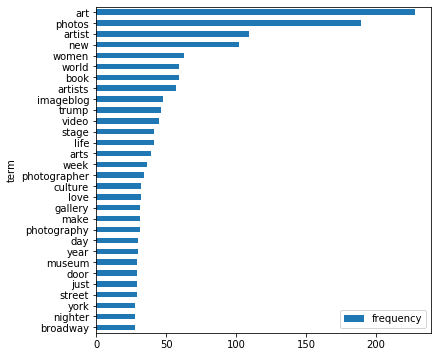

In [175]:
plt.rcParams["figure.figsize"] = (6,6)

pd.DataFrame(kk, columns = ["term", "frequency"]).set_index("term").sort_values("frequency").plot(kind="barh") 

In [180]:
for l in labels: 
  print(l)
  print(X_train[Y_train == l].sample(n = 5))
  print()

A
1603    Thefts Are an Ever-Present Problem at Arts and Crafts Fairs                       
1041    John Grisham Calls String Of Arkansas Executions A 'Spectacular Legal Train Wreck'
1891    J.K. Rowling Gives Her North American School A Backstory And A Sorting Quiz       
1266    A Shattered 'Glass Menagerie'                                                     
434     Yves Klein Sponge Relief Expected To Nab $10 Million At Auction (PHOTO)           
Name: headline, dtype: object

B
2900    Winter Storm Hitting East Coast Could Shatter All-Time Cold Temperature Records
3864    Oakland Votes To Ban Coal Shipments, Could End Export Plans                    
2956    Underwater Heatwave Sending Fish, Sea Critters Fleeing For The Poles           
2867    25 GIFs From 'Planet Earth II' That Show How Tragicomic Nature Can Be          
3477    Chevron Refinery Protest In California Sees Over 200 Arrests                   
Name: headline, dtype: object

C
5919    Report: Marines Probed For Po

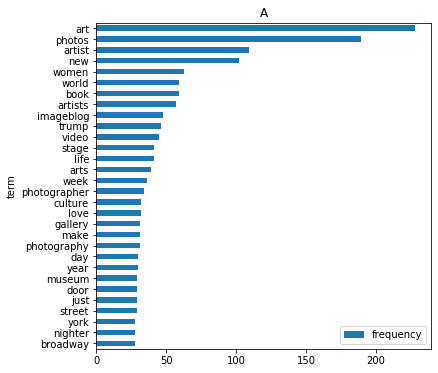

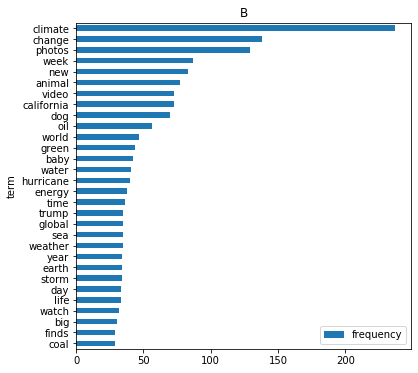

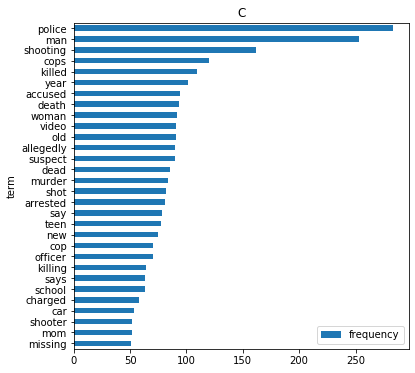

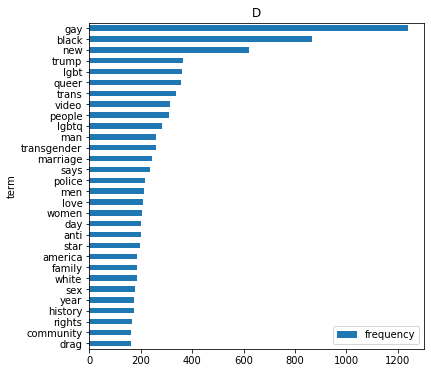

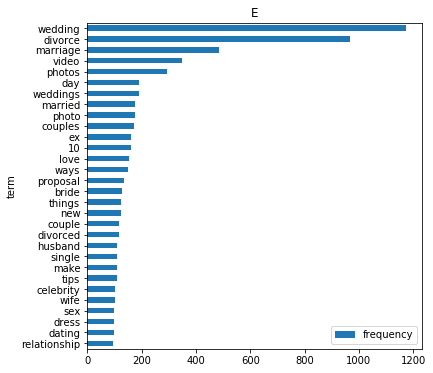

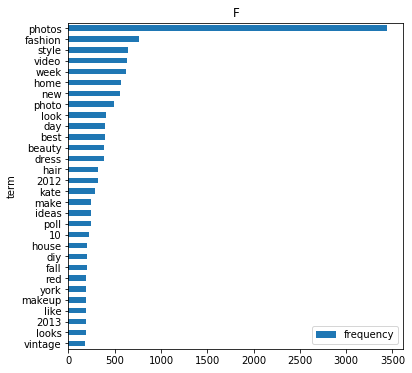

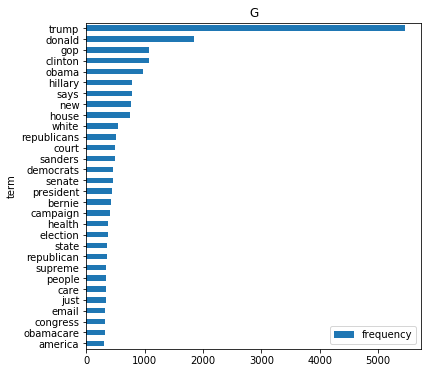

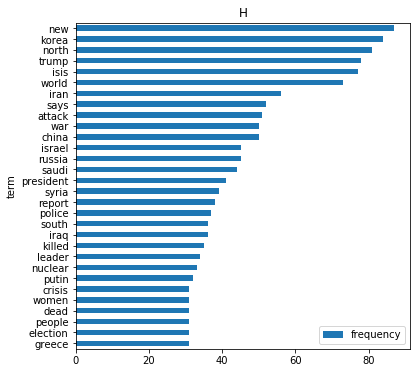

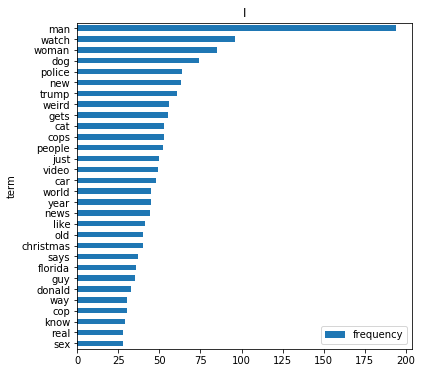

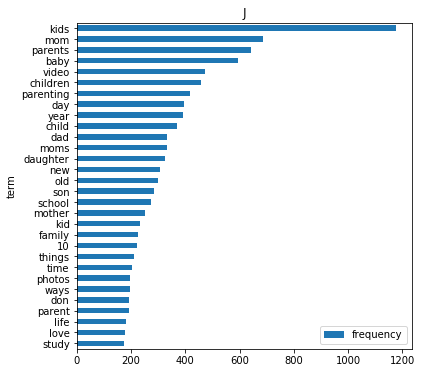

In [181]:
for l in labels: 
  freqTerms = showFreqTerms(pipeline['count_vectorizer'].transform(X_train[Y_train == l]), vectorizer)[0:30]
  pd.DataFrame(freqTerms, columns = ["term", "frequency"]).set_index("term").sort_values("frequency").plot(kind="barh", title = l ) 
